Midpoint Riemann Sum: 0.33249999999999996


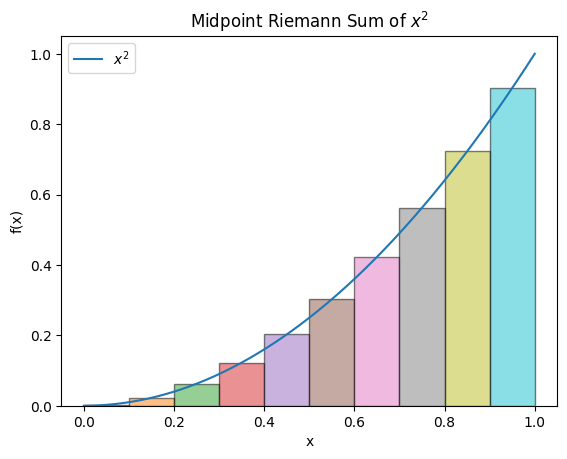

In [1]:
import numpy as np

import matplotlib.pyplot as plt

# Function to calculate the midpoint Riemann sum
def midpoint_riemann_sum(f, a, b, n):
    dx = (b - a) / n
    midpoints = np.linspace(a + dx/2, b - dx/2, n)
    return np.sum(f(midpoints) * dx)

# Function to be integrated
def f(x):
    return x**2

# Parameters
a = 0  # Start of interval
b = 1  # End of interval
n = 10  # Number of subintervals

# Calculate the midpoint Riemann sum
riemann_sum = midpoint_riemann_sum(f, a, b, n)
print(f"Midpoint Riemann Sum: {riemann_sum}")

# Plotting
x = np.linspace(a, b, 1000)
y = f(x)

plt.plot(x, y, label='$x^2$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Midpoint Riemann Sum of $x^2$')

# Plot the rectangles
dx = (b - a) / n
for i in range(n):
    mid_x = a + dx/2 + i*dx
    plt.bar(mid_x, f(mid_x), width=dx, align='center', edgecolor='black', alpha=0.5)

plt.legend()
plt.show()

Left Riemann Sum: 18.275624999999998


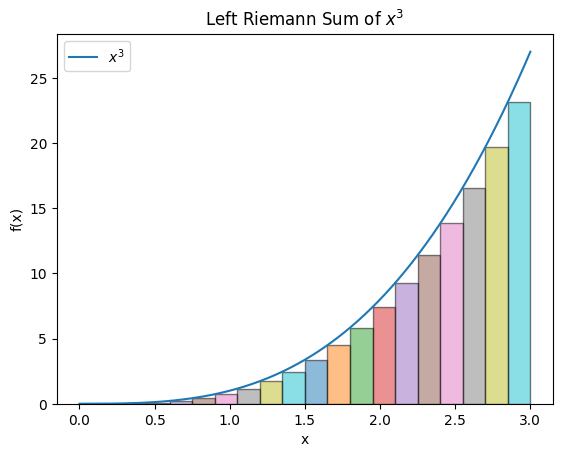

In [ ]:
# prompt: use python to plot a left-hand Riemann sum of x^3 from 0 to 3

import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the left Riemann sum
def left_riemann_sum(f, a, b, n):
    dx = (b - a) / n
    left_endpoints = np.linspace(a, b - dx, n)
    return np.sum(f(left_endpoints) * dx)

# Function to be integrated
def f(x):
    return x**3

# Parameters
a = 0  # Start of interval
b = 3  # End of interval
n = 20  # Number of subintervals

# Calculate the left Riemann sum
riemann_sum = left_riemann_sum(f, a, b, n)
print(f"Left Riemann Sum: {riemann_sum}")

# Plotting
x = np.linspace(a, b, 1000)
y = f(x)

plt.plot(x, y, label='$x^3$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Left Riemann Sum of $x^3$')

# Plot the rectangles
dx = (b - a) / n
for i in range(n):
    left_x = a + i * dx
    plt.bar(left_x, f(left_x), width=dx, align='edge', edgecolor='black', alpha=0.5)

plt.legend()
plt.show()

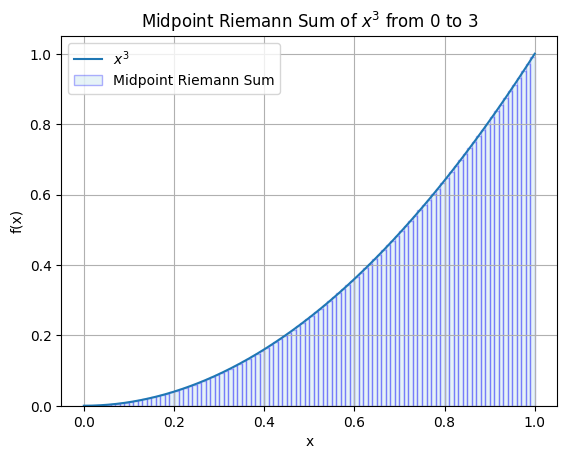

np.float64(0.3333250000000001)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return x**2

# Define the interval and number of rectangles
a, b = 0, 1
n = 100  # number of rectangles
dx = (b - a) / n

# Midpoints
midpoints = np.linspace(a + dx/2, b - dx/2, n)
midpoint_sum = np.sum(f(midpoints) * dx)

# Plot the function
x = np.linspace(a, b, 1000)
y = f(x)

plt.plot(x, y, label='$x^3$')
plt.bar(midpoints, f(midpoints), width=dx, alpha=0.3, align='center', edgecolor='blue', color='lightblue', label='Midpoint Riemann Sum')
plt.title('Midpoint Riemann Sum of $x^3$ from 0 to 3')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

midpoint_sum


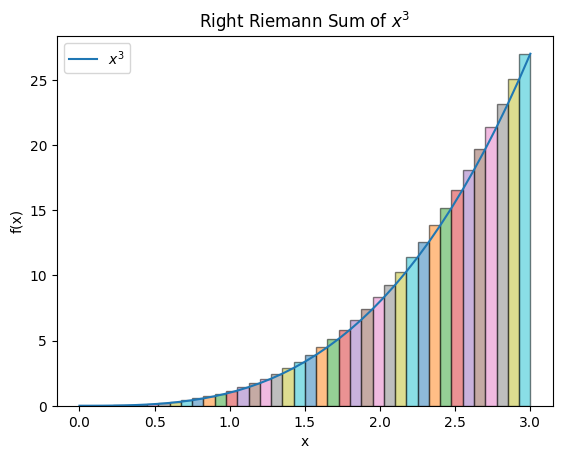

In [ ]:
# prompt: plot right had Riemann sum of x^3 between 0 and 3 in python

import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return x**3

a = 0
b = 3
n = 40

x = np.linspace(a, b, n + 1)
y = f(x)

dx = (b - a) / n

plt.plot(x, y, label='$x^3$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Right Riemann Sum of $x^3$')

for i in range(n):
  plt.bar(x[i], y[i+1], width=dx, align='edge', edgecolor='black', alpha=0.5)


plt.legend()
plt.show()


In [3]:
!pip install pyscf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 MB 14.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 31.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [4]:
import numpy as np
import pyscf
import scipy
#from pyscf import gto, scf, mcscf, mcpdft, lib

mol = pyscf.gto.Mole()

mol.atom = '''
  H      1.0686     -0.1411      1.0408
  C      0.5979      0.0151      0.0688
  H      1.2687      0.2002     -0.7717
  O     -0.5960     -0.0151     -0.0686
'''

mol.spin=0
mol.charge=0
mol.basis='sto-3g'
mol.build()

def get_hcore(mol):
    '''
    args:
        mol: Mole object
    returns:
        hcoreL t+v
    '''
    t = mol.intor_symmetric('int1e_kin')
    v = mol.intor_symmetric('int1e_nuc')
    hcore = t+v
    return hcore

def get_eri(mol):
    '''
    args:
        mol: Mole object
    returns:
        electron repulsion integrals
    '''
    eri = mol.intor('int2e')
    return eri

def get_veff(mol,dm):
    eri = get_eri(mol)
    J = np.einsum('pqrs, qp->rs', eri, dm)
    K = np.einsum('pqrs, rq->ps', eri, dm)
    return J - 0.5*K

def construct_fock(mol,dm):
    '''
    args:
        mol: Mole object
        dm: density matrix
    returns:
        fock: Fock matrix
    '''
    hcore = get_hcore(mol)
    veff = get_veff(mol,dm)
    fock = hcore + veff
    return fock

nbasis = mol.nao
h1 = np.zeros([nbasis, nbasis])

def construct_dm(mol, mo_coeff):
    '''
    args:
        mol: Mole object
        mo_coeff = molecular orbital coefficients
    returns:
        dm: density matrix
    '''
    nocc = (mol.nelectron//2)
    dm = 2. * np.dot(mo_coeff[:, :nocc], mo_coeff[:, :nocc].T)
    return dm

mo_coeff = np.zeros_like(h1)
dm = construct_dm(mol, mo_coeff)

def get_energy(mol, dm):
    h1 = get_hcore(mol)
    veff = get_veff(mol, dm)
    energy = np.einsum('pq, qp->', h1, dm) \
            + 0.5 * np.einsum('pq,qp->', veff, dm)\
            + mol.energy_nuc()
    return energy

def generalized_eigval(fock, s):
    mo_energy, mo_coeff = scipy.linalg.eigh(fock, s)
    return mo_energy, mo_coeff

def scf_procedure(mol, ethresh=1e-7, dmthresh=1e-7, maxiter=100):
# obtain overlap matrix
    s = mol.intor_symmetric('int1e_ovlp')

# initial guess
    mo_coeff = np.zeros_like(s)
    dm = construct_dm(mol, mo_coeff)

# start SCF Procedure
    converge = False
    energy = 0
    for i in range(maxiter):
        fock = construct_fock(mol,dm)
        mo_energy, mo_coeff = generalized_eigval(fock, s)
        new_dm = construct_dm(mol, mo_coeff)
        new_energy = get_energy(mol, new_dm)
        print('Iteration: ', i, 'energy: ' , new_energy)
        if np.abs(energy - new_energy) < ethresh and np.linalg.norm(new_dm - dm) < dmthresh:
            converge = True
            print("SCF has converged :^) ")
            break

        dm = new_dm
        energy = new_energy
    if not converge:
        print("SCF has not converged, womp womp ")
    return energy, mo_coeff

if __name__ == '__main__':

    energy = scf_procedure(mol)[0]
    print('printing energy here:', energy)



Iteration:  0 energy:  -107.10676547060143
Iteration:  1 energy:  -103.27925466934781
Iteration:  2 energy:  -110.5280705058154
Iteration:  3 energy:  -110.71358404278007
Iteration:  4 energy:  -111.81369621287732
Iteration:  5 energy:  -112.05955897386238
Iteration:  6 energy:  -112.25151285999269
Iteration:  7 energy:  -112.31418356359828
Iteration:  8 energy:  -112.34031252787528
Iteration:  9 energy:  -112.34890987398805
Iteration:  10 energy:  -112.3519686857187
Iteration:  11 energy:  -112.35298565845207
Iteration:  12 energy:  -112.35333396841895
Iteration:  13 energy:  -112.3534507908839
Iteration:  14 energy:  -112.35349039433743
Iteration:  15 energy:  -112.35350372917844
Iteration:  16 energy:  -112.3535082358847
Iteration:  17 energy:  -112.35350975557714
Iteration:  18 energy:  -112.35351026868759
Iteration:  19 energy:  -112.35351044180652
Iteration:  20 energy:  -112.35351050024158
Iteration:  21 energy:  -112.35351051996136
Iteration:  22 energy:  -112.35351052661716
It

In [ ]:
#!/usr/bin/env python

'''
Initialize a molecular system.

There are many methods to define/initialize a molecule.  This example presents
three methods to create/initialize the molecular object.  Mole object is a
Python object.  You can initialize the Mole object using any methods supported
by Python.

See also

pyscf/examples/pbc/06-load_mol_from_chkfile.py  to initialize mol from chkfile

pyscf/examples/pbc/00-input_cell.py  for initialization of crystal

'''

from pyscf import gto

#
# First method is to assign the geometry, basis etc. to Mole object, then
# call build() function to initialize the molecule
#
mol = gto.Mole()
mol.atom = '''O 0 0 0; H  0 1 0; H 0 0 1'''
mol.basis = 'sto-3g'
mol.build()

#
# Shortcuts for initialization.
#
# Use the keyword arguments of mol.build() to initialize a molecule
#
mol = gto.Mole()
mol.build(
    atom = '''O 0 0 0; H  0 1 0; H 0 0 1''',
    basis = 'sto-3g',
)

#
# Use shortcut function gto.M or pyscf.M to initialize a molecule
#
mol = gto.M(
    atom = '''O 0 0 0; H  0 1 0; H 0 0 1''',
    basis = 'sto-3g',
)

import pyscf
mol = pyscf.M(
    atom = '''O 0 0 0; H  0 1 0; H 0 0 1''',
    basis = 'sto-3g',
)



#
# Other parameters
# ================
#

mol.charge = 0
mol.spin = 0 # 2j == nelec_alpha - nelec_beta
mol.symmetry = 1  # Allow the program to apply point group symmetry if possible
# .unit can be 'bohr', 'ang' to indicate the coordinates unit of the input mol.atom
# If a number is assigned to unit, this number will be used as the length of
# 1 Bohr (in Angstrom).  Eg you can double the bond length of a system by
# setting mol.unit = 0.529*.5.
mol.unit = 'Ang'    # (New in version 1.1)

# Output
# ------
# To write output on disk, assign a filename to Mole.output
mol.output = 'mole_scf.txt'
# if Mole.output is not given, the default output would be stdout

# Print level
# -----------
# Mole.verbose is used to control print level.  The print level can be 0 (quite,
# no output) to 9 (very noise).  The default level is 1, which only outputs the
# error message, it works almost the same as level 0.  Level 4 (info), or 5 (debug)
# are recommended value if some calculation detials are needed.
mol.verbose = 5
# level 4 hides some details such as CPU timings, the orbital energies during
# the SCF iterations.

# max memory to use
# -----------------
mol.max_memory = 1000 # in MB
# or use evnrionment  PYSCF_MAX_MEMORY  to control the memory usage
# (New in PySCF-1.3) eg
#    export PYSCF_MAX_MEMORY=10000 # 10 GB
#    python 00-input_mole.py

# Whether to use Cartesian GTOs (New since version 1.5)
# -----------------------------------------------------
# default: False
mol.cart = True

In [ ]:
#!/usr/bin/env python
#
# Author: Qiming Sun <osirpt.sun@gmail.com>
#

from pyscf import gto, scf, ao2mo

'''
A simple example to call integral transformation for given orbitals
'''

mol = gto.Mole()
mol.build(
    atom = 'H 0 0 0; F 0 0 1.1',  # in Angstrom
    basis = 'ccpvdz',
    symmetry = True,
)

myhf = scf.RHF(mol)
myhf.kernel()

orb = myhf.mo_coeff
eri_4fold = ao2mo.kernel(mol, orb)
print('MO integrals (ij|kl) with 4-fold symmetry i>=j, k>=l have shape %s' %
    str(eri_4fold.shape))


#
# Starting from PySCF-1.7, the MO integrals can be computed with the code
# below.
#
import pyscf
mol = pyscf.M(
    atom = 'H 0 0 0; F 0 0 1.1',  # in Angstrom
    basis = 'ccpvdz',
    symmetry = True,
)
orb = mol.RHF().run().mo_coeff
eri_4fold = mol.ao2mo(orb)

converged SCF energy = -99.9873974403489
MO integrals (ij|kl) with 4-fold symmetry i>=j, k>=l have shape (190, 190)
converged SCF energy = -99.9873974403489


In [2]:
#!/usr/bin/env python
#
# Author: Qiming Sun <osirpt.sun@gmail.com>
#

'''
A simple example to run MP2 calculation.
'''

import pyscf

mol = pyscf.M(
    atom = 'H 0 0 0; F 0 0 1.1',
    basis = 'ccpvdz')

mf = mol.RHF().run()

mf.MP2().run()

converged SCF energy = -99.9873974403486
E(MP2) = -100.198764900601  E_corr = -0.211367460252203
E(SCS-MP2) = -100.193014429233  E_corr = -0.205616988884259


In [3]:
#!/usr/bin/env python
#
# Author: Qiming Sun <osirpt.sun@gmail.com>
#

'''
A simple example to run FCI
'''

import pyscf

mol = pyscf.M(
    atom = 'H 0 0 0; F 0 0 1.1',  # in Angstrom
    basis = 'sto3g',
    symmetry = True,
)
myhf = mol.RHF().run()

#
# create an FCI solver based on the SCF object
#
cisolver = pyscf.fci.FCI(myhf)
print('E(FCI) = %.12f' % cisolver.kernel()[0])

#
# create an FCI solver based on the SCF object
#
myuhf = mol.UHF().run()
cisolver = pyscf.fci.FCI(myuhf)
print('E(UHF-FCI) = %.12f' % cisolver.kernel()[0])

myghf = mol.GHF().run()
cisolver = pyscf.fci.FCI(myghf)
print('E(GHF-FCI) = %.12f' % cisolver.kernel()[0])

mydhf = mol.DHF().set(with_gaunt=True, with_breit=True).run()
cisolver = pyscf.fci.FCI(mydhf)
print('E(DHF-FCI) = %.12f' % cisolver.kernel()[0])

#
# create an FCI solver based on the given orbitals and the num. electrons and
# spin of the mol object
#
cisolver = pyscf.fci.FCI(mol, myhf.mo_coeff)
print('E(FCI) = %.12f' % cisolver.kernel()[0])

converged SCF energy = -98.552190448278
E(FCI) = -98.595121449138
converged SCF energy = -98.5521904482781  <S^2> = 2.1316282e-14  2S+1 = 1
E(UHF-FCI) = -98.595121449139
converged SCF energy = -98.552190448278  <S^2> = 5.0182081e-14  2S+1 = 1
E(GHF-FCI) = -98.595121449138
converged SCF energy = -98.6114614232271
E(DHF-FCI) = -98.654444476861
E(FCI) = -98.595121449138


In [5]:
!pip install geometric

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for geometric: filename=geometric-1.0.2-py3-none-any.whl size=397151 sha256=403c74f4e2624d619a4d308e56d0b451a7349c31576b5db09237e65f88e13b34
  Stored in directory: /home/codespace/.cache/pip/wheels/e1/49/d5/4821638dee61bcc8da3d30a27d556ab27a5cab8dbc4a3a7c6c
Successfully built geometric

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [6]:
#!/usr/bin/env python

'''
Use geomeTRIC library to optimize the molecular geometry.
'''

from pyscf import gto, scf
from pyscf.geomopt.geometric_solver import optimize

mol = gto.M(atom='N 0 0 0; N 0 0 1.2', basis='ccpvdz')
mf = scf.RHF(mol)

#
# geometry optimization for HF.  There are two entries to invoke the geomeTRIC
# optimization
#
# method 1: import the optimize function from pyscf.geomopt.geometric_solver
mol_eq = optimize(mf)
print(mol_eq.tostring())
print('Atomic coordinates (Ang):')
print(mol_eq.atom_coords(unit='Ang'))
print('Atomic coordinates (Bohr):')
print(mol_eq.atom_coords(unit='Bohr'))

# method 2: create the optimizer from Gradients class
mol_eq = mf.Gradients().optimizer(solver='geomeTRIC').kernel()

#
# geometry optimization for CASSCF
#
from pyscf import mcscf
mf = scf.RHF(mol)
mc = mcscf.CASSCF(mf, 4, 4)
conv_params = {
    'convergence_energy': 1e-4,  # Eh
    'convergence_grms': 3e-3,    # Eh/Bohr
    'convergence_gmax': 4.5e-3,  # Eh/Bohr
    'convergence_drms': 1.2e-2,  # Angstrom
    'convergence_dmax': 1.8e-2,  # Angstrom
}
# method 1
mol_eq = optimize(mc, **conv_params)

# method 2
mol_eq = mc.Gradients().optimizer(solver='geomeTRIC').kernel(conv_params)


#
# geometry optimization for DFT, MP2, CCSD
#
mol = gto.M(atom='''
C       1.1879  -0.3829 0.0000
C       0.0000  0.5526  0.0000
O       -1.1867 -0.2472 0.0000
H       -1.9237 0.3850  0.0000
H       2.0985  0.2306  0.0000
H       1.1184  -1.0093 0.8869
H       1.1184  -1.0093 -0.8869
H       -0.0227 1.1812  0.8852
H       -0.0227 1.1812  -0.8852
            ''', basis='3-21g')

mf = mol.RKS(xc='pbe,')
mol1 = optimize(mf)

mymp2 = mol.MP2()
mol1 = optimize(mymp2)

mycc = mol.CCSD()
mol1 = optimize(mycc)

geometric-optimize called with the following command line:
/home/codespace/.local/lib/python3.12/site-packages/ipykernel_launcher.py --f=/home/codespace/.local/share/jupyter/runtime/kernel-v3e47f6fa00269294b177cad0c4318bb42ec99b298.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.000000    0.000000  0.000000  0.000000
   N   0.000000   0.000000   1.200000    0.000000  0.000000  0.000000
converged SCF energy = -108.914051975052
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 N     0.0000000000     0.0000000000    -0.3121321606
1 N    -0.0000000000    -0.0000000000     0.3121321606
----------------------------------------------
cycle 1: E = -108.914051975  dE = -108.914  norm(grad) = 0.441422


Step    0 : Gradient = 3.121e-01/3.121e-01 (rms/max) Energy = -108.9140519751
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 1.04823e+00



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N  -0.000000  -0.000000   0.078787   -0.000000 -0.000000  0.078787
   N   0.000000   0.000000   1.121213    0.000000  0.000000 -0.078787
converged SCF energy = -108.950818282088
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 N     0.0000000000     0.0000000000     0.1496540574
1 N    -0.0000000000    -0.0000000000    -0.1496540574
----------------------------------------------
cycle 2: E = -108.950818282  dE = -0.0367663  norm(grad) = 0.211643


Step    1 : Displace = 7.879e-02/7.879e-02 (rms/max) Trust = 1.000e-01 (=) Grad = 1.497e-01/1.497e-01 (rms/max) E (change) = -108.9508182821 (-3.677e-02) Quality = 0.791
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 1.55081e+00



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N  -0.000000  -0.000000   0.053254    0.000000  0.000000 -0.025533
   N   0.000000   0.000000   1.146746   -0.000000 -0.000000  0.025533
converged SCF energy = -108.954648860849
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 N    -0.0000000000    -0.0000000000    -0.0584004464
1 N     0.0000000000     0.0000000000     0.0584004464
----------------------------------------------
cycle 3: E = -108.954648861  dE = -0.00383058  norm(grad) = 0.0825907


Step    2 : Displace = 2.553e-02/2.553e-02 (rms/max) Trust = 1.414e-01 (+) Grad = 5.840e-02/5.840e-02 (rms/max) E (change) = -108.9546488608 (-3.831e-03) Quality = 0.530
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 2.15600e+00



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N  -0.000000  -0.000000   0.060421   -0.000000  0.000000  0.007167
   N   0.000000   0.000000   1.139579    0.000000 -0.000000 -0.007167
converged SCF energy = -108.95554642031
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 N     0.0000000000    -0.0000000000    -0.0070314700
1 N    -0.0000000000     0.0000000000     0.0070314700
----------------------------------------------
cycle 4: E = -108.95554642  dE = -0.000897559  norm(grad) = 0.009944


Step    3 : Displace = 7.167e-03/7.167e-03 (rms/max) Trust = 1.414e-01 (=) Grad = 7.031e-03/7.031e-03 (rms/max) E (change) = -108.9555464203 (-8.976e-04) Quality = 1.135
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 1.89641e+00



Geometry optimization cycle 5
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N  -0.000000   0.000000   0.061402   -0.000000  0.000000  0.000981
   N   0.000000  -0.000000   1.138598    0.000000 -0.000000 -0.000981
converged SCF energy = -108.955558747925
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 N    -0.0000000000     0.0000000000     0.0003987613
1 N     0.0000000000    -0.0000000000    -0.0003987613
----------------------------------------------
cycle 5: E = -108.955558748  dE = -1.23276e-05  norm(grad) = 0.000563934


Step    4 : Displace = 9.810e-04/9.810e-04 (rms/max) Trust = 2.000e-01 (+) Grad = 3.988e-04/3.988e-04 (rms/max) E (change) = -108.9555587479 (-1.233e-05) Quality = 0.946
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 2.00396e+00



Geometry optimization cycle 6
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N  -0.000000  -0.000000   0.061349    0.000000 -0.000000 -0.000053
   N   0.000000   0.000000   1.138651   -0.000000  0.000000  0.000053
converged SCF energy = -108.955558787298
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 N     0.0000000000     0.0000000000    -0.0000030148
1 N    -0.0000000000    -0.0000000000     0.0000030148
----------------------------------------------
cycle 6: E = -108.955558787  dE = -3.93724e-08  norm(grad) = 4.26356e-06


Step    5 : Displace = 5.265e-05/5.265e-05 (rms/max) Trust = 2.828e-01 (+) Grad = 3.015e-06/3.015e-06 (rms/max) E (change) = -108.9555587873 (-3.937e-08) Quality = 0.992
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 2.00396e+00
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 2.798 seconds
geometric-optimize called with the following command line:
/home/codespace/.local/lib/pyth

N          -0.00000       -0.00000        0.06135
N           0.00000        0.00000        1.13865
Atomic coordinates (Ang):
[[-4.17256654e-14 -4.27436276e-15  6.13491859e-02]
 [ 4.17256654e-14  4.27436276e-15  1.13865081e+00]]
Atomic coordinates (Bohr):
[[-7.88500800e-14 -8.07737497e-15  1.15933159e-01]
 [ 7.88500800e-14  8.07737497e-15  2.15173819e+00]]

Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.000000    0.000000  0.000000  0.000000
   N   0.000000   0.000000   1.200000    0.000000  0.000000  0.000000
converged SCF energy = -108.914051975052
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 N     0.0000000000     0.0000000000    -0.3121321606
1 N    -0.0000000000    -0.0000000000     0.3121321606
----------------------------------------------
cycle 1: E = -108.914051975  dE = -108.914  norm(grad) = 0.441422


Step    0 : Gradient = 3.121e-01/3.121e-01 (rms/max) Energy = -108.9140519751
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 1.04823e+00



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N  -0.000000  -0.000000   0.078787   -0.000000 -0.000000  0.078787
   N   0.000000   0.000000   1.121213    0.000000  0.000000 -0.078787
converged SCF energy = -108.950818282088
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 N     0.0000000000     0.0000000000     0.1496540574
1 N    -0.0000000000    -0.0000000000    -0.1496540574
----------------------------------------------
cycle 2: E = -108.950818282  dE = -0.0367663  norm(grad) = 0.211643


Step    1 : Displace = 7.879e-02/7.879e-02 (rms/max) Trust = 1.000e-01 (=) Grad = 1.497e-01/1.497e-01 (rms/max) E (change) = -108.9508182821 (-3.677e-02) Quality = 0.791
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 1.55081e+00



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N  -0.000000  -0.000000   0.053254   -0.000000  0.000000 -0.025533
   N   0.000000   0.000000   1.146746    0.000000 -0.000000  0.025533
converged SCF energy = -108.954648860849
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 N    -0.0000000000    -0.0000000000    -0.0584004464
1 N     0.0000000000     0.0000000000     0.0584004464
----------------------------------------------
cycle 3: E = -108.954648861  dE = -0.00383058  norm(grad) = 0.0825907


Step    2 : Displace = 2.553e-02/2.553e-02 (rms/max) Trust = 1.414e-01 (+) Grad = 5.840e-02/5.840e-02 (rms/max) E (change) = -108.9546488608 (-3.831e-03) Quality = 0.530
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 2.15600e+00



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N  -0.000000  -0.000000   0.060421   -0.000000 -0.000000  0.007167
   N   0.000000   0.000000   1.139579    0.000000  0.000000 -0.007167
converged SCF energy = -108.955546420309
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 N     0.0000000000    -0.0000000000    -0.0070314700
1 N    -0.0000000000     0.0000000000     0.0070314700
----------------------------------------------
cycle 4: E = -108.95554642  dE = -0.000897559  norm(grad) = 0.009944


Step    3 : Displace = 7.167e-03/7.167e-03 (rms/max) Trust = 1.414e-01 (=) Grad = 7.031e-03/7.031e-03 (rms/max) E (change) = -108.9555464203 (-8.976e-04) Quality = 1.135
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 1.89641e+00



Geometry optimization cycle 5
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N  -0.000000  -0.000000   0.061402   -0.000000  0.000000  0.000981
   N   0.000000   0.000000   1.138598    0.000000 -0.000000 -0.000981
converged SCF energy = -108.955558747925
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 N    -0.0000000000    -0.0000000000     0.0003987613
1 N     0.0000000000     0.0000000000    -0.0003987613
----------------------------------------------
cycle 5: E = -108.955558748  dE = -1.23276e-05  norm(grad) = 0.000563934


Step    4 : Displace = 9.810e-04/9.810e-04 (rms/max) Trust = 2.000e-01 (+) Grad = 3.988e-04/3.988e-04 (rms/max) E (change) = -108.9555587479 (-1.233e-05) Quality = 0.946
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 2.00396e+00



Geometry optimization cycle 6
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N  -0.000000   0.000000   0.061349    0.000000  0.000000 -0.000053
   N   0.000000  -0.000000   1.138651   -0.000000 -0.000000  0.000053
converged SCF energy = -108.955558787298
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 N     0.0000000000     0.0000000000    -0.0000030148
1 N    -0.0000000000    -0.0000000000     0.0000030148
----------------------------------------------
cycle 6: E = -108.955558787  dE = -3.93722e-08  norm(grad) = 4.26356e-06


Step    5 : Displace = 5.265e-05/5.265e-05 (rms/max) Trust = 2.828e-01 (+) Grad = 3.015e-06/3.015e-06 (rms/max) E (change) = -108.9555587873 (-3.937e-08) Quality = 0.992
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 2.00396e+00
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 0.821 seconds
geometric-optimize called with the following command line:
/home/codespace/.local/lib/pyth


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.000000    0.000000  0.000000  0.000000
   N   0.000000   0.000000   1.200000    0.000000  0.000000  0.000000
converged SCF energy = -108.914051975052
CASSCF energy = -109.023541785457
CASCI E = -109.023541785457  E(CI) = -5.47634839586703  S^2 = 0.0000000
--------------- CASSCF_Scanner gradients ---------------
         x                y                z
0 N    -0.0000000000    -0.0000000000    -0.2147041747
1 N     0.0000000000     0.0000000000     0.2147041747
----------------------------------------------
cycle 1: E = -109.023541785  dE = -109.024  norm(grad) = 0.303638


Step    0 : Gradient = 2.147e-01/2.147e-01 (rms/max) Energy = -109.0235417855
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 1.04823e+00



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.054194    0.000000  0.000000  0.054194
   N  -0.000000  -0.000000   1.145806   -0.000000 -0.000000 -0.054194
converged SCF energy = -108.954845033198
CASSCF energy = -109.045859712789
CASCI E = -109.045859712789  E(CI) = -5.77909810595742  S^2 = 0.0000000
--------------- CASSCF_Scanner gradients ---------------
         x                y                z
0 N    -0.0000000239    -0.0000000296     0.0313190745
1 N     0.0000000239     0.0000000296    -0.0313190745
----------------------------------------------
cycle 2: E = -109.045859713  dE = -0.0223179  norm(grad) = 0.0442919


Step    1 : Displace = 5.419e-02/5.419e-02 (rms/max) Trust = 1.000e-01 (=) Grad = 3.132e-02/3.132e-02 (rms/max) E (change) = -109.0458597128 (-2.232e-02) Quality = 1.015
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 1.20114e+00



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000001   0.047295    0.000000  0.000001 -0.006899
   N  -0.000000  -0.000001   1.152705   -0.000000 -0.000001  0.006899
converged SCF energy = -108.952888428334
CASSCF energy = -109.046096386693
CASCI E = -109.046096386693  E(CI) = -5.73686563042907  S^2 = 0.0000000
--------------- CASSCF_Scanner gradients ---------------
         x                y                z
0 N     0.0000000221     0.0000000291    -0.0124462407
1 N    -0.0000000221    -0.0000000291     0.0124462407
----------------------------------------------
cycle 3: E = -109.046096387  dE = -0.000236674  norm(grad) = 0.0176016


Step    2 : Displace = 6.899e-03/6.899e-03 (rms/max) Trust = 1.414e-01 (+) Grad = 1.245e-02/1.245e-02 (rms/max) E (change) = -109.0460963867 (-2.367e-04) Quality = 0.580
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 1.67847e+00



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.049257   -0.000000 -0.000000  0.001962
   N  -0.000000  -0.000000   1.150743    0.000000  0.000000 -0.001962
converged SCF energy = -108.95356465286
CASSCF energy = -109.046144338832
CASCI E = -109.046144338832  E(CI) = -5.74874706387590  S^2 = 0.0000000
--------------- CASSCF_Scanner gradients ---------------
         x                y                z
0 N    -0.0000000031    -0.0000000057    -0.0004371596
1 N     0.0000000031     0.0000000057     0.0004371596
----------------------------------------------
cycle 4: E = -109.046144339  dE = -4.79521e-05  norm(grad) = 0.000618237


Step    3 : Displace = 1.962e-03/1.962e-03 (rms/max) Trust = 1.414e-01 (=) Grad = 4.372e-04/4.372e-04 (rms/max) E (change) = -109.0461443388 (-4.795e-05) Quality = 1.039
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 1.67847e+00
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 3.365 seconds
geometric-optimize called with the following command line:
/home/codespace/.local/lib/pyth


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.000000    0.000000  0.000000  0.000000
   N   0.000000   0.000000   1.200000    0.000000  0.000000  0.000000
converged SCF energy = -108.914051975052
CASSCF energy = -109.023541786402
CASCI E = -109.023541786402  E(CI) = -5.47634782936939  S^2 = 0.0000000
--------------- CASSCF_Scanner gradients ---------------
         x                y                z
0 N     0.0000000000    -0.0000000000    -0.2147025174
1 N    -0.0000000000     0.0000000000     0.2147025174
----------------------------------------------
cycle 1: E = -109.023541786  dE = -109.024  norm(grad) = 0.303635


Step    0 : Gradient = 2.147e-01/2.147e-01 (rms/max) Energy = -109.0235417864
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 1.04823e+00



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N  -0.000000   0.000000   0.054194   -0.000000  0.000000  0.054194
   N   0.000000  -0.000000   1.145806    0.000000 -0.000000 -0.054194
converged SCF energy = -108.954844951073
CASSCF energy = -109.045859762330
CASCI E = -109.045859762330  E(CI) = -5.77909577782566  S^2 = 0.0000000
--------------- CASSCF_Scanner gradients ---------------
         x                y                z
0 N     0.0000000110    -0.0000000199     0.0313180718
1 N    -0.0000000110     0.0000000199    -0.0313180718
----------------------------------------------
cycle 2: E = -109.045859762  dE = -0.022318  norm(grad) = 0.0442904


Step    1 : Displace = 5.419e-02/5.419e-02 (rms/max) Trust = 1.000e-01 (=) Grad = 3.132e-02/3.132e-02 (rms/max) E (change) = -109.0458597623 (-2.232e-02) Quality = 1.015
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 1.20113e+00



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N  -0.000000   0.000000   0.047295   -0.000000  0.000000 -0.006899
   N   0.000000  -0.000000   1.152705    0.000000 -0.000000  0.006899
converged SCF energy = -108.952888347781
CASSCF energy = -109.046096376399
CASCI E = -109.046096376399  E(CI) = -5.73686421096828  S^2 = 0.0000000
--------------- CASSCF_Scanner gradients ---------------
         x                y                z
0 N    -0.0000000142     0.0000000204    -0.0124475501
1 N     0.0000000142    -0.0000000204     0.0124475501
----------------------------------------------
cycle 3: E = -109.046096376  dE = -0.000236614  norm(grad) = 0.0176035


Step    2 : Displace = 6.899e-03/6.899e-03 (rms/max) Trust = 1.414e-01 (+) Grad = 1.245e-02/1.245e-02 (rms/max) E (change) = -109.0460963764 (-2.366e-04) Quality = 0.580
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 1.67853e+00



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N  -0.000000   0.000000   0.049257    0.000000 -0.000000  0.001962
   N   0.000000  -0.000000   1.150743   -0.000000  0.000000 -0.001962
converged SCF energy = -108.953564626257
CASSCF energy = -109.046144338695
CASCI E = -109.046144338695  E(CI) = -5.74874683639317  S^2 = 0.0000000
--------------- CASSCF_Scanner gradients ---------------
         x                y                z
0 N     0.0000000023    -0.0000000042    -0.0004376977
1 N    -0.0000000023     0.0000000042     0.0004376977
----------------------------------------------
cycle 4: E = -109.046144339  dE = -4.79623e-05  norm(grad) = 0.000618998


Step    3 : Displace = 1.962e-03/1.962e-03 (rms/max) Trust = 1.414e-01 (=) Grad = 4.377e-04/4.377e-04 (rms/max) E (change) = -109.0461443387 (-4.796e-05) Quality = 1.039
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 1.67853e+00
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 3.129 seconds
geometric-optimize called with the following command line:
/home/codespace/.local/lib/pyth


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   1.187900  -0.382900   0.000000    0.000000  0.000000  0.000000
   C   0.000000   0.552600   0.000000    0.000000  0.000000  0.000000
   O  -1.186700  -0.247200   0.000000    0.000000  0.000000  0.000000
   H  -1.923700   0.385000   0.000000    0.000000  0.000000  0.000000
   H   2.098500   0.230600   0.000000    0.000000  0.000000  0.000000
   H   1.118400  -1.009300   0.886900    0.000000  0.000000  0.000000
   H   1.118400  -1.009300  -0.886900    0.000000  0.000000  0.000000
   H  -0.022700   1.181200   0.885200    0.000000  0.000000  0.000000
   H  -0.022700   1.181200  -0.885200    0.000000  0.000000  0.000000
converged SCF energy = -153.123690226514
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 C    -0.0048889158    -0.0054941607    -0.0000000000
1 C     0.0049713043    -0.0130257240     0.000

Step    0 : Gradient = 2.929e-02/5.768e-02 (rms/max) Energy = -153.1236902265
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 5.00000e-02 ... 3.52879e-01 4.08372e-01 5.31726e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   1.195955  -0.380048   0.000000    0.008055  0.002852  0.000000
   C  -0.030642   0.591545   0.000000   -0.030642  0.038945  0.000000
   O  -1.258780  -0.275064   0.000000   -0.072080 -0.027864  0.000000
   H  -2.082472   0.313085   0.000000   -0.158772 -0.071915  0.000000
   H   2.155169   0.186324   0.000000    0.056669 -0.044276  0.000000
   H   1.156462  -1.033680   0.900130    0.038062 -0.024380  0.013230
   H   1.156462  -1.033680  -0.900130    0.038062 -0.024380 -0.013230
   H   0.041176   1.257372   0.902831    0.063876  0.076172  0.017631
   H   0.041176   1.257372  -0.902831    0.063876  0.076172 -0.017631
converged SCF energy = -153.135617940136
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 C     0.0011091211     0.0054556069     0.0000000000
1 C     0.0010089942    -0.0064368613    -0.000

Step    1 : Displace = 8.748e-02/1.751e-01 (rms/max) Trust = 1.000e-01 (=) Grad = 6.741e-03/1.482e-02 (rms/max) E (change) = -153.1356179401 (-1.193e-02) Quality = 0.892
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 4.99997e-02 ... 3.52879e-01 4.23607e-01 5.12845e-01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   1.193794  -0.386104   0.000000   -0.002161 -0.006056  0.000000
   C  -0.032169   0.594430   0.000000   -0.001527  0.002885  0.000000
   O  -1.242200  -0.293198   0.000000    0.016579 -0.018134 -0.000000
   H  -2.042960   0.340685   0.000000    0.039512  0.027601 -0.000000
   H   2.150041   0.188230   0.000000   -0.005128  0.001906  0.000000
   H   1.157055  -1.039070   0.903942    0.000593 -0.005390  0.003812
   H   1.157055  -1.039070  -0.903942    0.000593 -0.005390 -0.003812
   H   0.018906   1.260228   0.907195   -0.022270  0.002856  0.004364
   H   0.018906   1.260228  -0.907195   -0.022270  0.002856 -0.004364
converged SCF energy = -153.136226375246
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 C    -0.0012942911     0.0006138664    -0.0000000000
1 C    -0.0035305974    -0.0011065958    -0.000

Step    2 : Displace = 2.145e-02/4.763e-02 (rms/max) Trust = 1.414e-01 (+) Grad = 1.886e-03/3.700e-03 (rms/max) E (change) = -153.1362263752 (-6.084e-04) Quality = 0.904
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 4.99937e-02 ... 3.52879e-01 4.57849e-01 4.88523e-01



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   1.197890  -0.385759   0.000000    0.004096  0.000345  0.000000
   C  -0.028958   0.592346   0.000000    0.003211 -0.002084  0.000000
   O  -1.245470  -0.290411   0.000000   -0.003270  0.002788  0.000000
   H  -2.048217   0.345427   0.000000   -0.005257  0.004741  0.000000
   H   2.154570   0.187974   0.000000    0.004529 -0.000256  0.000000
   H   1.156715  -1.035125   0.904860   -0.000341  0.003946  0.000918
   H   1.156715  -1.035125  -0.904860   -0.000341  0.003946 -0.000918
   H   0.018700   1.255230   0.907393   -0.000206 -0.004998  0.000197
   H   0.018700   1.255230  -0.907393   -0.000206 -0.004998 -0.000197
converged SCF energy = -153.136282324086
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 C     0.0000167220     0.0002800884    -0.0000000000
1 C    -0.0013647445    -0.0015580619    -0.000

Step    3 : Displace = 4.720e-03/6.698e-03 (rms/max) Trust = 2.000e-01 (+) Grad = 8.839e-04/2.071e-03 (rms/max) E (change) = -153.1362823241 (-5.595e-05) Quality = 1.149
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 4.98775e-02 ... 3.52879e-01 3.90139e-01 4.87862e-01



Geometry optimization cycle 5
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   1.198449  -0.385498   0.000000    0.000559  0.000261  0.000000
   C  -0.027169   0.593580   0.000000    0.001789  0.001234  0.000000
   O  -1.245550  -0.290364   0.000000   -0.000080  0.000047 -0.000000
   H  -2.048685   0.346766   0.000000   -0.000468  0.001339 -0.000000
   H   2.155066   0.187880   0.000000    0.000495 -0.000094  0.000000
   H   1.156202  -1.034019   0.904846   -0.000513  0.001105 -0.000014
   H   1.156202  -1.034019  -0.904846   -0.000513  0.001105  0.000014
   H   0.019897   1.254944   0.907500    0.001197 -0.000286  0.000107
   H   0.019897   1.254944  -0.907500    0.001197 -0.000286 -0.000107
converged SCF energy = -153.136288685728
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 C     0.0001489182    -0.0000028825     0.0000000000
1 C    -0.0005189998    -0.0006456338     0.000

Step    4 : Displace = 9.429e-04/1.399e-03 (rms/max) Trust = 2.828e-01 (+) Grad = 3.515e-04/8.284e-04 (rms/max) E (change) = -153.1362886857 (-6.362e-06) Quality = 1.250
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 4.74181e-02 ... 3.52879e-01 3.69638e-01 5.10296e-01



Geometry optimization cycle 6
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   1.198782  -0.385141   0.000000    0.000333  0.000357 -0.000000
   C  -0.025986   0.594989   0.000000    0.001182  0.001409  0.000000
   O  -1.245366  -0.289858   0.000000    0.000184  0.000506  0.000000
   H  -2.048118   0.348067   0.000000    0.000567  0.001301  0.000000
   H   2.155909   0.187382   0.000000    0.000843 -0.000498 -0.000000
   H   1.156227  -1.033680   0.904748    0.000025  0.000339 -0.000098
   H   1.156227  -1.033680  -0.904748    0.000025  0.000339  0.000098
   H   0.020566   1.255727   0.907612    0.000669  0.000782  0.000112
   H   0.020566   1.255727  -0.907612    0.000669  0.000782 -0.000112
converged SCF energy = -153.136289836941
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 C     0.0000774270    -0.0000879162     0.0000000000
1 C    -0.0001144425    -0.0000529002     0.000

Step    5 : Displace = 4.310e-04/8.867e-04 (rms/max) Trust = 3.000e-01 (+) Grad = 1.047e-04/1.918e-04 (rms/max) E (change) = -153.1362898369 (-1.151e-06) Quality = 1.115
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 3.96197e-02 ... 3.52879e-01 3.67357e-01 4.94944e-01



Geometry optimization cycle 7
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   1.199024  -0.384795   0.000000    0.000241  0.000346 -0.000000
   C  -0.025267   0.595801   0.000000    0.000719  0.000812 -0.000000
   O  -1.245047  -0.289067   0.000000    0.000319  0.000791 -0.000000
   H  -2.047386   0.349155   0.000000    0.000732  0.001088 -0.000000
   H   2.156532   0.187156   0.000000    0.000623 -0.000226 -0.000000
   H   1.156235  -1.033436   0.904728    0.000008  0.000245 -0.000019
   H   1.156235  -1.033436  -0.904728    0.000008  0.000245  0.000019
   H   0.021259   1.256437   0.907663    0.000693  0.000710  0.000051
   H   0.021259   1.256437  -0.907663    0.000693  0.000710 -0.000051
converged SCF energy = -153.136289926183
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 C     0.0000172877    -0.0000436469    -0.0000000000
1 C    -0.0000091938     0.0000560722     0.000

Step    6 : Displace = 1.804e-04/2.441e-04 (rms/max) Trust = 3.000e-01 (=) Grad = 3.874e-05/6.207e-05 (rms/max) E (change) = -153.1362899262 (-8.924e-08) Quality = 0.700
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 3.96197e-02 ... 3.52879e-01 3.67357e-01 4.94944e-01
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 28.329 seconds


converged SCF energy = -153.219208484875


geometric-optimize called with the following command line:
/home/codespace/.local/lib/python3.12/site-packages/ipykernel_launcher.py --f=/home/codespace/.local/share/jupyter/runtime/kernel-v3e47f6fa00269294b177cad0c4318bb42ec99b298.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   1.187900  -0.382900   0.000000    0.000000  0.000000  0.000000
   C   0.000000   0.552600   0.000000    0.000000  0.000000  0.000000
   O  -1.186700  -0.247200   0.000000    0.000000  0.000000  0.000000
   H  -1.923700   0.385000   0.000000    0.000000  0.000000  0.000000
   H   2.098500   0.230600   0.000000    0.000000  0.000000  0.000000
   H   1.118400  -1.009300   0.886900    0.000000  0.000000  0.000000
   H   1.118400  -1.009300  -0.886900    0.000000  0.000000  0.000000
   H  -0.022700   1.181200   0.885200    0.000000  0.000000  0.000000
   H  -0.022700   1.181200  -0.885200    0.000000  0.000000  0.000000
converged SCF energy = -153.219208484875
E(MP2_Scanner) = -153.524696682997  E_corr = -0.305488198121804
E(SCS-MP2_Scanner) = -153.528317640072  E_corr = -0.309109155196426
--------------- MP2_Scanner gradients ---------------
         x     

Step    0 : Gradient = 1.586e-02/3.302e-02 (rms/max) Energy = -153.5246966830
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 5.00000e-02 ... 3.52879e-01 4.08372e-01 5.31726e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   1.179237  -0.370829   0.000000   -0.008663  0.012071  0.000000
   C  -0.018153   0.588795   0.000000   -0.018153  0.036195  0.000000
   O  -1.227929  -0.265843  -0.000000   -0.041229 -0.018643 -0.000000
   H  -2.041895   0.296341   0.000000   -0.118195 -0.088659  0.000000
   H   2.124722   0.177518   0.000000    0.026222 -0.053082  0.000000
   H   1.132267  -1.009651   0.884736    0.013867 -0.000351 -0.002164
   H   1.132267  -1.009651  -0.884736    0.013867 -0.000351  0.002164
   H   0.043441   1.237609   0.887082    0.066141  0.056409  0.001882
   H   0.043441   1.237609  -0.887082    0.066141  0.056409 -0.001882
converged SCF energy = -153.220296521984
E(MP2_Scanner) = -153.529098121871  E_corr = -0.308801599887418
E(SCS-MP2_Scanner) = -153.532907327702  E_corr = -0.31261080571803
--------------- MP2_Scanner gradients ---------------
         x      

Step    1 : Displace = 7.052e-02/1.478e-01 (rms/max) Trust = 1.000e-01 (=) Grad = 4.383e-03/9.094e-03 (rms/max) E (change) = -153.5290981219 (-4.401e-03) Quality = 0.724
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 5.00000e-02 ... 3.52952e-01 4.48871e-01 5.23571e-01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   1.176159  -0.375219   0.000000   -0.003079 -0.004390 -0.000000
   C  -0.017592   0.589805   0.000000    0.000560  0.001010  0.000000
   O  -1.209699  -0.274738   0.000000    0.018230 -0.008896  0.000000
   H  -2.005787   0.315680  -0.000000    0.036107  0.019339 -0.000000
   H   2.119295   0.178432   0.000000   -0.005426  0.000914 -0.000000
   H   1.130560  -1.013124   0.886481   -0.001707 -0.003473  0.001745
   H   1.130560  -1.013124  -0.886481   -0.001707 -0.003473 -0.001745
   H   0.021952   1.237094   0.888622   -0.021490 -0.000516  0.001539
   H   0.021952   1.237094  -0.888622   -0.021490 -0.000516 -0.001539
converged SCF energy = -153.220695051345
E(MP2_Scanner) = -153.529556709528  E_corr = -0.308861658182954
E(SCS-MP2_Scanner) = -153.533371861288  E_corr = -0.312676809943075
--------------- MP2_Scanner gradients ---------------
         x     

Step    2 : Displace = 1.860e-02/4.120e-02 (rms/max) Trust = 1.000e-01 (=) Grad = 9.696e-04/1.896e-03 (rms/max) E (change) = -153.5295567095 (-4.586e-04) Quality = 0.947
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 5.00000e-02 ... 3.52879e-01 4.62558e-01 5.24673e-01



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   1.179238  -0.374769  -0.000000    0.003079  0.000450 -0.000000
   C  -0.015961   0.586454  -0.000000    0.001631 -0.003351 -0.000000
   O  -1.212136  -0.272727   0.000000   -0.002437  0.002012  0.000000
   H  -2.007644   0.320182  -0.000000   -0.001857  0.004502 -0.000000
   H   2.123314   0.179066  -0.000000    0.004019  0.000634 -0.000000
   H   1.130030  -1.010181   0.887554   -0.000530  0.002943  0.001074
   H   1.130030  -1.010181  -0.887554   -0.000530  0.002943 -0.001074
   H   0.020265   1.232027   0.888660   -0.001686 -0.005066  0.000038
   H   0.020265   1.232027  -0.888660   -0.001686 -0.005066 -0.000038
converged SCF energy = -153.220806290745
E(MP2_Scanner) = -153.52957742365  E_corr = -0.308771132904843
E(SCS-MP2_Scanner) = -153.533385519212  E_corr = -0.312579228467308
--------------- MP2_Scanner gradients ---------------
         x      

Step    3 : Displace = 4.096e-03/5.359e-03 (rms/max) Trust = 1.414e-01 (+) Grad = 3.540e-04/7.420e-04 (rms/max) E (change) = -153.5295774236 (-2.071e-05) Quality = 0.831
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 5.00000e-02 ... 3.52879e-01 4.48805e-01 5.15677e-01



Geometry optimization cycle 5
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   1.178655  -0.374774  -0.000000   -0.000583 -0.000004 -0.000000
   C  -0.015881   0.587200  -0.000000    0.000080  0.000746 -0.000000
   O  -1.211851  -0.273381  -0.000000    0.000285 -0.000654 -0.000000
   H  -2.007698   0.319244   0.000000   -0.000054 -0.000938  0.000000
   H   2.122474   0.178974  -0.000000   -0.000840 -0.000092 -0.000000
   H   1.129884  -1.010371   0.887432   -0.000146 -0.000191 -0.000122
   H   1.129884  -1.010371  -0.887432   -0.000146 -0.000191  0.000122
   H   0.020967   1.232690   0.888722    0.000702  0.000662  0.000062
   H   0.020967   1.232690  -0.888722    0.000702  0.000662 -0.000062
converged SCF energy = -153.220770604516
E(MP2_Scanner) = -153.529578725572  E_corr = -0.308808121056144
E(SCS-MP2_Scanner) = -153.533387334188  E_corr = -0.312616729671718
--------------- MP2_Scanner gradients ---------------
         x     

Step    4 : Displace = 7.471e-04/9.678e-04 (rms/max) Trust = 2.000e-01 (+) Grad = 1.219e-04/2.900e-04 (rms/max) E (change) = -153.5295787256 (-1.302e-06) Quality = 1.119
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 5.00000e-02 ... 3.57284e-01 4.15248e-01 5.15962e-01



Geometry optimization cycle 6
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   1.178653  -0.374775  -0.000000   -0.000002 -0.000001  0.000000
   C  -0.015775   0.587381   0.000000    0.000106  0.000181  0.000000
   O  -1.211911  -0.273529   0.000000   -0.000060 -0.000148  0.000000
   H  -2.007698   0.319288   0.000000    0.000000  0.000043  0.000000
   H   2.122562   0.178817  -0.000000    0.000088 -0.000157  0.000000
   H   1.129937  -1.010396   0.887406    0.000053 -0.000024 -0.000026
   H   1.129937  -1.010396  -0.887406    0.000053 -0.000024  0.000026
   H   0.020847   1.232755   0.888770   -0.000120  0.000065  0.000048
   H   0.020847   1.232755  -0.888770   -0.000120  0.000065 -0.000048
converged SCF energy = -153.220758195329
E(MP2_Scanner) = -153.529578836162  E_corr = -0.308820640833156
E(SCS-MP2_Scanner) = -153.533388406086  E_corr = -0.312630210756979
--------------- MP2_Scanner gradients ---------------
         x     

Step    5 : Displace = 1.308e-04/2.105e-04 (rms/max) Trust = 2.828e-01 (+) Grad = 3.508e-05/8.209e-05 (rms/max) E (change) = -153.5295788362 (-1.106e-07) Quality = 1.181
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 5.00000e-02 ... 3.57284e-01 4.15248e-01 5.15962e-01
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 6.503 seconds


converged SCF energy = -153.219208484874


geometric-optimize called with the following command line:
/home/codespace/.local/lib/python3.12/site-packages/ipykernel_launcher.py --f=/home/codespace/.local/share/jupyter/runtime/kernel-v3e47f6fa00269294b177cad0c4318bb42ec99b298.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   1.187900  -0.382900   0.000000    0.000000  0.000000  0.000000
   C   0.000000   0.552600   0.000000    0.000000  0.000000  0.000000
   O  -1.186700  -0.247200   0.000000    0.000000  0.000000  0.000000
   H  -1.923700   0.385000   0.000000    0.000000  0.000000  0.000000
   H   2.098500   0.230600   0.000000    0.000000  0.000000  0.000000
   H   1.118400  -1.009300   0.886900    0.000000  0.000000  0.000000
   H   1.118400  -1.009300  -0.886900    0.000000  0.000000  0.000000
   H  -0.022700   1.181200   0.885200    0.000000  0.000000  0.000000
   H  -0.022700   1.181200  -0.885200    0.000000  0.000000  0.000000
converged SCF energy = -153.219208484876


<class 'pyscf.cc.ccsd.CCSD_Scanner'> does not have attributes  converged


E(CCSD_Scanner) = -153.5554662024344  E_corr = -0.3362577175588298
--------------- CCSD_Scanner gradients ---------------
         x                y                z
0 C    -0.0010094328    -0.0068314470     0.0000000000
1 C     0.0032055831    -0.0108005441    -0.0000000000
2 O     0.0111005725     0.0308539032    -0.0000000000
3 H     0.0196281948    -0.0068524656     0.0000000000
4 H    -0.0041685732     0.0068338158    -0.0000000000
5 H    -0.0046167651     0.0040204032    -0.0044778834
6 H    -0.0046167651     0.0040204032     0.0044778834
7 H    -0.0097614071    -0.0106220343    -0.0079034586
8 H    -0.0097614071    -0.0106220343     0.0079034586
----------------------------------------------
cycle 1: E = -153.555466202  dE = -153.555  norm(grad) = 0.0490134


Step    0 : Gradient = 1.634e-02/3.279e-02 (rms/max) Energy = -153.5554662024
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 5.00000e-02 ... 3.52879e-01 4.08372e-01 5.31726e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   1.182483  -0.372689  -0.000000   -0.005417  0.010211 -0.000000
   C  -0.019235   0.589937   0.000000   -0.019235  0.037337  0.000000
   O  -1.230635  -0.262849   0.000000   -0.043935 -0.015649  0.000000
   H  -2.046958   0.297731   0.000000   -0.123258 -0.087269  0.000000
   H   2.131698   0.178063  -0.000000    0.033198 -0.052537 -0.000000
   H   1.135764  -1.014583   0.887859    0.017364 -0.005283  0.000959
   H   1.135764  -1.014583  -0.887859    0.017364 -0.005283 -0.000959
   H   0.039260   1.240436   0.890703    0.061960  0.059236  0.005503
   H   0.039260   1.240436  -0.890703    0.061960  0.059236 -0.005503
converged SCF energy = -153.219857613085
E(CCSD_Scanner) = -153.560245913688  E_corr = -0.3403883006031579
--------------- CCSD_Scanner gradients ---------------
         x                y                z
0 C     0.0021560276     0.00429762

Step    1 : Displace = 7.162e-02/1.510e-01 (rms/max) Trust = 1.000e-01 (=) Grad = 4.340e-03/9.131e-03 (rms/max) E (change) = -153.5602459137 (-4.780e-03) Quality = 0.748
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 5.00000e-02 ... 3.52879e-01 4.47271e-01 5.23682e-01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   1.178951  -0.376790   0.000000   -0.003532 -0.004101  0.000000
   C  -0.019473   0.591151   0.000000   -0.000238  0.001214  0.000000
   O  -1.212512  -0.273185   0.000000    0.018123 -0.010336  0.000000
   H  -2.010627   0.316391   0.000000    0.036331  0.018661  0.000000
   H   2.125699   0.179114   0.000000   -0.005999  0.001051  0.000000
   H   1.133425  -1.017666   0.889851   -0.002339 -0.003083  0.001992
   H   1.133425  -1.017666  -0.889851   -0.002339 -0.003083 -0.001992
   H   0.019257   1.240275   0.892297   -0.020003 -0.000161  0.001595
   H   0.019257   1.240275  -0.892297   -0.020003 -0.000161 -0.001595
converged SCF energy = -153.220182816037
E(CCSD_Scanner) = -153.5606784168226  E_corr = -0.3404956007852392
--------------- CCSD_Scanner gradients ---------------
         x                y                z
0 C    -0.0007735756     0.0000590

Step    2 : Displace = 1.830e-02/4.108e-02 (rms/max) Trust = 1.000e-01 (=) Grad = 9.726e-04/1.726e-03 (rms/max) E (change) = -153.5606784168 (-4.325e-04) Quality = 0.930
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 5.00000e-02 ... 3.52879e-01 4.55604e-01 5.25105e-01



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   1.182046  -0.376425   0.000000    0.003095  0.000365  0.000000
   C  -0.017838   0.587996   0.000000    0.001634 -0.003155  0.000000
   O  -1.214739  -0.270925   0.000000   -0.002226  0.002260  0.000000
   H  -2.012848   0.320354   0.000000   -0.002221  0.003963  0.000000
   H   2.129487   0.179567   0.000000    0.003787  0.000453  0.000000
   H   1.132892  -1.014749   0.890781   -0.000533  0.002917  0.000930
   H   1.132892  -1.014749  -0.890781   -0.000533  0.002917 -0.000930
   H   0.017754   1.235415   0.892209   -0.001502 -0.004859 -0.000088
   H   0.017754   1.235415  -0.892209   -0.001502 -0.004859  0.000088
converged SCF energy = -153.220325329621
E(CCSD_Scanner) = -153.560699754276  E_corr = -0.3403744246549056
--------------- CCSD_Scanner gradients ---------------
         x                y                z
0 C     0.0001109049     0.00007855

Step    3 : Displace = 3.925e-03/5.104e-03 (rms/max) Trust = 1.414e-01 (+) Grad = 3.091e-04/6.602e-04 (rms/max) E (change) = -153.5606997543 (-2.134e-05) Quality = 0.865
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 5.00000e-02 ... 3.52879e-01 4.45297e-01 5.14155e-01



Geometry optimization cycle 5
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   1.181565  -0.376437   0.000000   -0.000481 -0.000013  0.000000
   C  -0.017759   0.588662   0.000000    0.000080  0.000666  0.000000
   O  -1.214471  -0.271490   0.000000    0.000268 -0.000565 -0.000000
   H  -2.012979   0.319478   0.000000   -0.000131 -0.000876  0.000000
   H   2.128794   0.179508   0.000000   -0.000693 -0.000058  0.000000
   H   1.132692  -1.014861   0.890700   -0.000200 -0.000112 -0.000081
   H   1.132692  -1.014861  -0.890700   -0.000200 -0.000112  0.000081
   H   0.018433   1.235950   0.892275    0.000678  0.000535  0.000066
   H   0.018433   1.235950  -0.892275    0.000678  0.000535 -0.000066
converged SCF energy = -153.220295128833
E(CCSD_Scanner) = -153.5607007044081  E_corr = -0.3404055755755326
--------------- CCSD_Scanner gradients ---------------
         x                y                z
0 C     0.0000145411     0.0000418

Step    4 : Displace = 6.633e-04/8.866e-04 (rms/max) Trust = 2.000e-01 (+) Grad = 1.031e-04/2.466e-04 (rms/max) E (change) = -153.5607007044 (-9.501e-07) Quality = 1.125
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 5.00000e-02 ... 3.52879e-01 4.45297e-01 5.14155e-01
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 24.166 seconds


In [7]:
!pip install -U pyberny

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 57.8 MB/s eta 0:00:00:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.2
    Uninstalling numpy-2.1.2:
      Successfully uninstalled numpy-2.1.2

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [8]:
#!/usr/bin/env python

'''
Use pyberny to get the molecular equilibrium geometry.
'''

from pyscf import gto, scf
from pyscf.geomopt.berny_solver import optimize

mol = gto.M(atom='N 0 0 0; N 0 0 1.2', basis='ccpvdz')
mf = scf.RHF(mol)

#
# geometry optimization for HF.  There are two entries to invoke the berny
# geometry optimization.
#
# method 1: import the optimize function from pyscf.geomopt.berny_solver
mol_eq = optimize(mf)
print(mol_eq.tostring())
print('Atomic coordinates (Ang):')
print(mol_eq.atom_coords(unit='Ang'))
print('Atomic coordinates (Bohr):')
print(mol_eq.atom_coords(unit='Bohr'))

# method 2: create the optimizer from Gradients class
mol_eq = mf.Gradients().optimizer(solver='berny').kernel()

#
# geometry optimization for CASSCF
#
from pyscf import mcscf
mf = scf.RHF(mol)
mc = mcscf.CASSCF(mf, 4, 4)
conv_params = {
    'gradientmax': 6e-3,  # Eh/Bohr
    'gradientrms': 2e-3,  # Eh/Bohr
    'stepmax': 2e-2,      # Bohr
    'steprms': 1.5e-2,    # Bohr
}
# method 1
mol_eq = optimize(mc, **conv_params)

# method 2
mol_eq = mc.Gradients().optimizer(solver='berny').kernel(conv_params)

0 Internal coordinates:0 * Number of fragments: 10 * Number of internal coordinates: 10 * Number of strong bonds: 1


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.000000    0.000000  0.000000  0.000000
   N   0.000000   0.000000   1.200000    0.000000  0.000000  0.000000
converged SCF energy = -108.914051975052
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 N     0.0000000000     0.0000000000    -0.3121321606
1 N    -0.0000000000    -0.0000000000     0.3121321606
----------------------------------------------
cycle 1: E = -108.914051975  dE = -108.914  norm(grad) = 0.441422


1 Energy: -108.9140519751 Minimization on sphere was performed:1 * Trust radius: 0.31 * Number of negative eigenvalues: 01 * Lowest eigenvalue: 0.551 * lambda: -0.4911 Quadratic step: RMS: 0.3, max: 0.31 * Predicted energy change: -0.06891 Total step: RMS: 0.3, max: 0.31 Perfect transformation to cartesians in 2 iterations1 * RMS(dcart): 2.27e-17, RMS(dq): 4.44e-161 Convergence criteria:1 * Gradient RMS: 0.312 > 0.00015 => no1 * Gradient maximum: 0.312 > 0.00045 => no1 * Minimization on sphere: Minimization on sphere => no


Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.079377    0.000000  0.000000  0.079377
   N   0.000000   0.000000   1.120623    0.000000  0.000000 -0.079377
converged SCF energy = -108.95047828901
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 N     0.0000000000     0.0000000000     0.1553465954
1 N    -0.0000000000    -0.0000000000    -0.1553465954
----------------------------------------------
cycle 2: E = -108.950478289  dE = -0.0364263  norm(grad) = 0.219693


2 Energy: -108.9504782892 Hessian update information:2 * Change: RMS: 1.01, max: 1.012 Trust update: Fletcher's parameter: 0.5292 Linear interpolation:2 * Energies: -108.95048, -108.914052 * Derivatives: -0.0466, 0.09362 * Quartic interpolation was performed: t = 0.232 * Interpolated energy: -108.955642 Pure RFO step was performed:2 * Trust radius: 0.32 * Number of negative eigenvalues: 02 * Lowest eigenvalue: 1.562 * lambda: -0.001482 Quadratic step: RMS: 0.0308, max: 0.03082 * Predicted energy change: -0.0007392 Total step: RMS: 0.0997, max: 0.09972 Perfect transformation to cartesians in 2 iterations2 * RMS(dcart): 1.03e-16, RMS(dq): 8.88e-162 Convergence criteria:2 * Gradient RMS: 0.155 > 0.00015 => no2 * Gradient maximum: 0.155 > 0.00045 => no2 * Step RMS: 0.0997 > 0.0012 => no2 * Step maximum: 0.0997 > 0.0018 => no


Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.053007    0.000000  0.000000 -0.026370
   N   0.000000   0.000000   1.146993    0.000000  0.000000  0.026370
converged SCF energy = -108.954593583816
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 N     0.0000000000     0.0000000000    -0.0600815552
1 N    -0.0000000000    -0.0000000000     0.0600815552
----------------------------------------------
cycle 3: E = -108.954593584  dE = -0.00411529  norm(grad) = 0.0849682


3 Energy: -108.9545935843 Hessian update information:3 * Change: RMS: 0.603, max: 0.6033 Trust update: Fletcher's parameter: 5.573 Linear interpolation:3 * Energies: -108.95459, -108.950483 * Derivatives: -0.00599, 0.01553 * Quartic interpolation was performed: t = 0.3173 * Interpolated energy: -108.955563 Pure RFO step was performed:3 * Trust radius: 0.33 * Number of negative eigenvalues: 03 * Lowest eigenvalue: 2.163 * lambda: -3.07e-053 Quadratic step: RMS: 0.00377, max: 0.003773 * Predicted energy change: -1.53e-053 Total step: RMS: 0.0278, max: 0.02783 Perfect transformation to cartesians in 2 iterations3 * RMS(dcart): 1.03e-16, RMS(dq): 8.88e-163 Convergence criteria:3 * Gradient RMS: 0.0601 > 0.00015 => no3 * Gradient maximum: 0.0601 > 0.00045 => no3 * Step RMS: 0.0278 > 0.0012 => no3 * Step maximum: 0.0278 > 0.0018 => no


Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.060361    0.000000  0.000000  0.007354
   N   0.000000   0.000000   1.139639    0.000000  0.000000 -0.007354
converged SCF energy = -108.955544787084
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 N     0.0000000000    -0.0000000000    -0.0074793717
1 N    -0.0000000000     0.0000000000     0.0074793717
----------------------------------------------
cycle 4: E = -108.955544787  dE = -0.000951203  norm(grad) = 0.0105774


4 Energy: -108.9555447874 Hessian update information:4 * Change: RMS: 0.269, max: 0.2694 Trust update: Fletcher's parameter: 62.04 Linear interpolation:4 * Energies: -108.95554, -108.954594 * Derivatives: 0.000208, 0.001674 * Quartic interpolation was performed: t = -0.1344 * Interpolated energy: -108.955564 Pure RFO step was performed:4 * Trust radius: 0.34 * Number of negative eigenvalues: 04 * Lowest eigenvalue: 1.894 * lambda: -8.79e-084 Quadratic step: RMS: 0.000216, max: 0.0002164 * Predicted energy change: -4.4e-084 Total step: RMS: 0.00395, max: 0.003954 Perfect transformation to cartesians in 2 iterations4 * RMS(dcart): 1.03e-16, RMS(dq): 8.88e-164 Convergence criteria:4 * Gradient RMS: 0.00748 > 0.00015 => no4 * Gradient maximum: 0.00748 > 0.00045 => no4 * Step RMS: 0.00395 > 0.0012 => no4 * Step maximum: 0.00395 > 0.0018 => no


Geometry optimization cycle 5
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.061407    0.000000  0.000000  0.001046
   N   0.000000   0.000000   1.138593    0.000000  0.000000 -0.001046
converged SCF energy = -108.955558739862
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 N    -0.0000000000    -0.0000000000     0.0004376918
1 N     0.0000000000     0.0000000000    -0.0004376918
----------------------------------------------
cycle 5: E = -108.95555874  dE = -1.39528e-05  norm(grad) = 0.00061899


5 Energy: -108.955558745 Hessian update information:5 * Change: RMS: 0.111, max: 0.1115 Trust update: Fletcher's parameter: 3.17e+025 Linear interpolation:5 * Energies: -108.95556, -108.955545 * Derivatives: -1.73e-06, 2.96e-055 * Quartic interpolation was performed: t = 0.05495 * Interpolated energy: -108.955565 Pure RFO step was performed:5 * Trust radius: 0.35 * Number of negative eigenvalues: 05 * Lowest eigenvalue: 2.05 * lambda: -4.45e-125 Quadratic step: RMS: 1.49e-06, max: 1.49e-065 * Predicted energy change: -2.22e-125 Total step: RMS: 0.000218, max: 0.0002185 Perfect transformation to cartesians in 2 iterations5 * RMS(dcart): 0.0, RMS(dq): 0.05 Convergence criteria:5 * Gradient RMS: 0.000438 > 0.00015 => no5 * Gradient maximum: 0.000438 < 0.00045 => OK5 * Step RMS: 0.000218 < 0.0012 => OK5 * Step maximum: 0.000218 < 0.0018 => OK


Geometry optimization cycle 6
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.061349    0.000000  0.000000 -0.000058
   N   0.000000   0.000000   1.138651    0.000000  0.000000  0.000058
converged SCF energy = -108.955558787297
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 N    -0.0000000000    -0.0000000000    -0.0000034788
1 N     0.0000000000     0.0000000000     0.0000034788
----------------------------------------------
cycle 6: E = -108.955558787  dE = -4.74346e-08  norm(grad) = 4.91975e-06


6 Energy: -108.9555587876 Hessian update information:6 * Change: RMS: 0.0159, max: 0.01596 Trust update: Fletcher's parameter: 2.14e+046 Linear interpolation:6 * Energies: -108.95556, -108.955566 * Derivatives: -7.6e-10, 9.56e-086 * Cubic interpolation was performed: t = 0.007896 * Interpolated energy: -108.955566 Pure RFO step was performed:6 * Trust radius: 0.36 * Number of negative eigenvalues: 06 * Lowest eigenvalue: 2.026 * lambda: -7.73e-206 Quadratic step: RMS: 1.96e-10, max: 1.96e-106 * Predicted energy change: -3.87e-206 Total step: RMS: 1.72e-06, max: 1.72e-066 Perfect transformation to cartesians in 1 iterations6 * RMS(dcart): 2.63e-07, RMS(dq): 1.72e-066 Convergence criteria:6 * Gradient RMS: 3.48e-06 < 0.00015 => OK6 * Gradient maximum: 3.48e-06 < 0.00045 => OK6 * Step RMS: 1.72e-06 < 0.0012 => OK6 * Step maximum: 1.72e-06 < 0.0018 => OK6 * All criteria matched0 Internal coordinates:0 * Number of fragments: 10 * Number of internal coordinates: 10 * Number of strong bonds: 

N           0.00000        0.00000        0.06135
N           0.00000        0.00000        1.13865
Atomic coordinates (Ang):
[[0.         0.         0.06134913]
 [0.         0.         1.13865087]]
Atomic coordinates (Bohr):
[[0.         0.         0.11593305]
 [0.         0.         2.1517383 ]]

Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.000000    0.000000  0.000000  0.000000
   N   0.000000   0.000000   1.200000    0.000000  0.000000  0.000000
converged SCF energy = -108.914051975052
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 N    -0.0000000000     0.0000000000    -0.3121321606
1 N     0.0000000000    -0.0000000000     0.3121321606
----------------------------------------------
cycle 1: E = -108.914051975  dE = -108.914  norm(grad) = 0.441422


1 Energy: -108.9140519751 Minimization on sphere was performed:1 * Trust radius: 0.31 * Number of negative eigenvalues: 01 * Lowest eigenvalue: 0.551 * lambda: -0.4911 Quadratic step: RMS: 0.3, max: 0.31 * Predicted energy change: -0.06891 Total step: RMS: 0.3, max: 0.31 Perfect transformation to cartesians in 2 iterations1 * RMS(dcart): 1.01e-16, RMS(dq): 8.88e-161 Convergence criteria:1 * Gradient RMS: 0.312 > 0.00015 => no1 * Gradient maximum: 0.312 > 0.00045 => no1 * Minimization on sphere: Minimization on sphere => no


Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.079377    0.000000  0.000000  0.079377
   N   0.000000   0.000000   1.120623    0.000000  0.000000 -0.079377
converged SCF energy = -108.95047828901
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 N     0.0000000000     0.0000000000     0.1553465954
1 N    -0.0000000000    -0.0000000000    -0.1553465954
----------------------------------------------
cycle 2: E = -108.950478289  dE = -0.0364263  norm(grad) = 0.219693


2 Energy: -108.9504782892 Hessian update information:2 * Change: RMS: 1.01, max: 1.012 Trust update: Fletcher's parameter: 0.5292 Linear interpolation:2 * Energies: -108.95048, -108.914052 * Derivatives: -0.0466, 0.09362 * Quartic interpolation was performed: t = 0.232 * Interpolated energy: -108.955642 Pure RFO step was performed:2 * Trust radius: 0.32 * Number of negative eigenvalues: 02 * Lowest eigenvalue: 1.562 * lambda: -0.001482 Quadratic step: RMS: 0.0308, max: 0.03082 * Predicted energy change: -0.0007392 Total step: RMS: 0.0997, max: 0.09972 Perfect transformation to cartesians in 2 iterations2 * RMS(dcart): 0.0, RMS(dq): 0.02 Convergence criteria:2 * Gradient RMS: 0.155 > 0.00015 => no2 * Gradient maximum: 0.155 > 0.00045 => no2 * Step RMS: 0.0997 > 0.0012 => no2 * Step maximum: 0.0997 > 0.0018 => no


Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.053007    0.000000  0.000000 -0.026370
   N   0.000000   0.000000   1.146993    0.000000  0.000000  0.026370
converged SCF energy = -108.954593583816
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 N    -0.0000000000    -0.0000000000    -0.0600815552
1 N     0.0000000000     0.0000000000     0.0600815552
----------------------------------------------
cycle 3: E = -108.954593584  dE = -0.00411529  norm(grad) = 0.0849682


3 Energy: -108.9545935843 Hessian update information:3 * Change: RMS: 0.603, max: 0.6033 Trust update: Fletcher's parameter: 5.573 Linear interpolation:3 * Energies: -108.95459, -108.950483 * Derivatives: -0.00599, 0.01553 * Quartic interpolation was performed: t = 0.3173 * Interpolated energy: -108.955563 Pure RFO step was performed:3 * Trust radius: 0.33 * Number of negative eigenvalues: 03 * Lowest eigenvalue: 2.163 * lambda: -3.07e-053 Quadratic step: RMS: 0.00377, max: 0.003773 * Predicted energy change: -1.53e-053 Total step: RMS: 0.0278, max: 0.02783 Perfect transformation to cartesians in 2 iterations3 * RMS(dcart): 1.03e-16, RMS(dq): 8.88e-163 Convergence criteria:3 * Gradient RMS: 0.0601 > 0.00015 => no3 * Gradient maximum: 0.0601 > 0.00045 => no3 * Step RMS: 0.0278 > 0.0012 => no3 * Step maximum: 0.0278 > 0.0018 => no


Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.060361    0.000000  0.000000  0.007354
   N   0.000000   0.000000   1.139639    0.000000  0.000000 -0.007354
converged SCF energy = -108.955544787084
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 N     0.0000000000     0.0000000000    -0.0074793717
1 N    -0.0000000000    -0.0000000000     0.0074793717
----------------------------------------------
cycle 4: E = -108.955544787  dE = -0.000951203  norm(grad) = 0.0105774


4 Energy: -108.9555447874 Hessian update information:4 * Change: RMS: 0.269, max: 0.2694 Trust update: Fletcher's parameter: 62.04 Linear interpolation:4 * Energies: -108.95554, -108.954594 * Derivatives: 0.000208, 0.001674 * Quartic interpolation was performed: t = -0.1344 * Interpolated energy: -108.955564 Pure RFO step was performed:4 * Trust radius: 0.34 * Number of negative eigenvalues: 04 * Lowest eigenvalue: 1.894 * lambda: -8.79e-084 Quadratic step: RMS: 0.000216, max: 0.0002164 * Predicted energy change: -4.4e-084 Total step: RMS: 0.00395, max: 0.003954 Perfect transformation to cartesians in 2 iterations4 * RMS(dcart): 1.03e-16, RMS(dq): 8.88e-164 Convergence criteria:4 * Gradient RMS: 0.00748 > 0.00015 => no4 * Gradient maximum: 0.00748 > 0.00045 => no4 * Step RMS: 0.00395 > 0.0012 => no4 * Step maximum: 0.00395 > 0.0018 => no


Geometry optimization cycle 5
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.061407    0.000000  0.000000  0.001046
   N   0.000000   0.000000   1.138593    0.000000  0.000000 -0.001046
converged SCF energy = -108.955558739863
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 N    -0.0000000000    -0.0000000000     0.0004376918
1 N     0.0000000000     0.0000000000    -0.0004376918
----------------------------------------------
cycle 5: E = -108.95555874  dE = -1.39528e-05  norm(grad) = 0.00061899


5 Energy: -108.955558745 Hessian update information:5 * Change: RMS: 0.111, max: 0.1115 Trust update: Fletcher's parameter: 3.17e+025 Linear interpolation:5 * Energies: -108.95556, -108.955545 * Derivatives: -1.73e-06, 2.96e-055 * Quartic interpolation was performed: t = 0.05495 * Interpolated energy: -108.955565 Pure RFO step was performed:5 * Trust radius: 0.35 * Number of negative eigenvalues: 05 * Lowest eigenvalue: 2.05 * lambda: -4.45e-125 Quadratic step: RMS: 1.49e-06, max: 1.49e-065 * Predicted energy change: -2.22e-125 Total step: RMS: 0.000218, max: 0.0002185 Perfect transformation to cartesians in 2 iterations5 * RMS(dcart): 0.0, RMS(dq): 0.05 Convergence criteria:5 * Gradient RMS: 0.000438 > 0.00015 => no5 * Gradient maximum: 0.000438 < 0.00045 => OK5 * Step RMS: 0.000218 < 0.0012 => OK5 * Step maximum: 0.000218 < 0.0018 => OK


Geometry optimization cycle 6
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.061349    0.000000  0.000000 -0.000058
   N   0.000000   0.000000   1.138651    0.000000  0.000000  0.000058
converged SCF energy = -108.955558787297
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 N     0.0000000000     0.0000000000    -0.0000034788
1 N    -0.0000000000    -0.0000000000     0.0000034788
----------------------------------------------
cycle 6: E = -108.955558787  dE = -4.74345e-08  norm(grad) = 4.91975e-06


6 Energy: -108.9555587876 Hessian update information:6 * Change: RMS: 0.0159, max: 0.01596 Trust update: Fletcher's parameter: 2.14e+046 Linear interpolation:6 * Energies: -108.95556, -108.955566 * Derivatives: -7.6e-10, 9.56e-086 * Cubic interpolation was performed: t = 0.007896 * Interpolated energy: -108.955566 Pure RFO step was performed:6 * Trust radius: 0.36 * Number of negative eigenvalues: 06 * Lowest eigenvalue: 2.026 * lambda: -8.47e-206 Quadratic step: RMS: 2.05e-10, max: 2.05e-106 * Predicted energy change: -4.23e-206 Total step: RMS: 1.72e-06, max: 1.72e-066 Perfect transformation to cartesians in 1 iterations6 * RMS(dcart): 2.63e-07, RMS(dq): 1.72e-066 Convergence criteria:6 * Gradient RMS: 3.48e-06 < 0.00015 => OK6 * Gradient maximum: 3.48e-06 < 0.00045 => OK6 * Step RMS: 1.72e-06 < 0.0012 => OK6 * Step maximum: 1.72e-06 < 0.0018 => OK6 * All criteria matched0 Internal coordinates:0 * Number of fragments: 10 * Number of internal coordinates: 10 * Number of strong bonds: 


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.000000    0.000000  0.000000  0.000000
   N   0.000000   0.000000   1.200000    0.000000  0.000000  0.000000
converged SCF energy = -108.914051975052
CASSCF energy = -109.023541786156
CASCI E = -109.023541786156  E(CI) = -5.47634756288353  S^2 = 0.0000000
--------------- CASSCF_Scanner gradients ---------------
         x                y                z
0 N     0.0000000000     0.0000000000    -0.2147039688
1 N    -0.0000000000    -0.0000000000     0.2147039688
----------------------------------------------
cycle 1: E = -109.023541786  dE = -109.024  norm(grad) = 0.303637


1 Energy: -109.0235417861 Minimization on sphere was performed:1 * Trust radius: 0.31 * Number of negative eigenvalues: 01 * Lowest eigenvalue: 0.551 * lambda: -0.1661 Quadratic step: RMS: 0.3, max: 0.31 * Predicted energy change: -0.03971 Total step: RMS: 0.3, max: 0.31 Perfect transformation to cartesians in 2 iterations1 * RMS(dcart): 2.27e-17, RMS(dq): 4.44e-161 Convergence criteria:1 * Gradient RMS: 0.215 > 0.002 => no1 * Gradient maximum: 0.215 > 0.006 => no1 * Minimization on sphere: Minimization on sphere => no


Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.079377    0.000000  0.000000  0.079377
   N   0.000000   0.000000   1.120623    0.000000  0.000000 -0.079377
converged SCF energy = -108.95047828901
CASSCF energy = -109.033857064843
CASCI E = -109.033857064843  E(CI) = -5.94355801189872  S^2 = 0.0000000
--------------- CASSCF_Scanner gradients ---------------
         x                y                z
0 N     0.0000000284    -0.0000000522     0.2325989972
1 N    -0.0000000284     0.0000000522    -0.2325989972
----------------------------------------------
cycle 2: E = -109.033857065  dE = -0.0103153  norm(grad) = 0.328945


2 Energy: -109.0338570652 Hessian update information:2 * Change: RMS: 0.941, max: 0.9412 Trust update: Fletcher's parameter: 0.262 Linear interpolation:2 * Energies: -109.03386, -109.023542 * Derivatives: -0.0698, 0.06442 * Quartic interpolation was performed: t = 0.382 * Interpolated energy: -109.046262 Pure RFO step was performed:2 * Trust radius: 0.32 * Number of negative eigenvalues: 02 * Lowest eigenvalue: 1.492 * lambda: -0.002632 Quadratic step: RMS: 0.042, max: 0.0422 * Predicted energy change: -0.001322 Total step: RMS: 0.156, max: 0.1562 Perfect transformation to cartesians in 2 iterations2 * RMS(dcart): 0.0, RMS(dq): 0.02 Convergence criteria:2 * Gradient RMS: 0.233 > 0.002 => no2 * Gradient maximum: 0.233 > 0.006 => no2 * Step RMS: 0.156 > 0.015 => no2 * Step maximum: 0.156 > 0.02 => no


Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.038120    0.000000  0.000000 -0.041256
   N   0.000000   0.000000   1.161880    0.000000  0.000000  0.041256
converged SCF energy = -108.948552985669
CASSCF energy = -109.044747508805
CASCI E = -109.044747508805  E(CI) = -5.68244840044422  S^2 = 0.0000000
--------------- CASSCF_Scanner gradients ---------------
         x                y                z
0 N     0.0000000101     0.0000000153    -0.0641801388
1 N    -0.0000000101    -0.0000000153     0.0641801388
----------------------------------------------
cycle 3: E = -109.044747509  dE = -0.0108904  norm(grad) = 0.0907644


3 Energy: -109.0447475093 Hessian update information:3 * Change: RMS: 0.412, max: 0.4123 Trust update: Fletcher's parameter: 8.263 Linear interpolation:3 * Energies: -109.04475, -109.033863 * Derivatives: -0.01, 0.03633 * Quartic interpolation was performed: t = 0.2733 * Interpolated energy: -109.046153 Pure RFO step was performed:3 * Trust radius: 0.33 * Number of negative eigenvalues: 03 * Lowest eigenvalue: 1.93 * lambda: -0.0001473 Quadratic step: RMS: 0.00878, max: 0.008783 * Predicted energy change: -7.34e-053 Total step: RMS: 0.0337, max: 0.03373 Perfect transformation to cartesians in 2 iterations3 * RMS(dcart): 1.03e-16, RMS(dq): 4.44e-163 Convergence criteria:3 * Gradient RMS: 0.0642 > 0.002 => no3 * Gradient maximum: 0.0642 > 0.006 => no3 * Step RMS: 0.0337 > 0.015 => no3 * Step maximum: 0.0337 > 0.02 => no


Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.047042    0.000000  0.000000  0.008922
   N   0.000000   0.000000   1.152958    0.000000  0.000000 -0.008922
converged SCF energy = -108.952794455803
CASSCF energy = -109.046083754187
CASCI E = -109.046083754187  E(CI) = -5.73533124005786  S^2 = 0.0000000
--------------- CASSCF_Scanner gradients ---------------
         x                y                z
0 N     0.0000000010    -0.0000000003    -0.0139640976
1 N    -0.0000000010     0.0000000003     0.0139640976
----------------------------------------------
cycle 4: E = -109.046083754  dE = -0.00133625  norm(grad) = 0.0197482


4 Energy: -109.0460837544 Hessian update information:4 * Change: RMS: 0.414, max: 0.4144 Trust update: Fletcher's parameter: 18.24 Linear interpolation:4 * Energies: -109.04608, -109.044754 * Derivatives: 0.000471, 0.002164 * Quartic interpolation was performed: t = -0.2564 * Interpolated energy: -109.046144 Pure RFO step was performed:4 * Trust radius: 0.34 * Number of negative eigenvalues: 04 * Lowest eigenvalue: 1.494 * lambda: -7.98e-074 Quadratic step: RMS: 0.000732, max: 0.0007324 * Predicted energy change: -3.99e-074 Total step: RMS: 0.00938, max: 0.009384 Perfect transformation to cartesians in 2 iterations4 * RMS(dcart): 1.03e-16, RMS(dq): 8.88e-164 Convergence criteria:4 * Gradient RMS: 0.014 > 0.002 => no4 * Gradient maximum: 0.014 > 0.006 => no4 * Step RMS: 0.00938 < 0.015 => OK4 * Step maximum: 0.00938 < 0.02 => OK


Geometry optimization cycle 5
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.049523    0.000000  0.000000  0.002481
   N   0.000000   0.000000   1.150477    0.000000  0.000000 -0.002481
converged SCF energy = -108.953649129371
CASSCF energy = -109.046143947425
CASCI E = -109.046143947425  E(CI) = -5.75036433261623  S^2 = 0.0000000
--------------- CASSCF_Scanner gradients ---------------
         x                y                z
0 N     0.0000000011     0.0000000002     0.0012156804
1 N    -0.0000000011    -0.0000000002    -0.0012156804
----------------------------------------------
cycle 5: E = -109.046143947  dE = -6.01932e-05  norm(grad) = 0.00171923


5 Energy: -109.0461439475 Hessian update information:5 * Change: RMS: 0.13, max: 0.135 Trust update: Fletcher's parameter: 1.51e+025 Linear interpolation:5 * Energies: -109.04614, -109.046085 * Derivatives: -1.14e-05, 0.0001315 * Quartic interpolation was performed: t = 0.07885 * Interpolated energy: -109.046145 Pure RFO step was performed:5 * Trust radius: 0.35 * Number of negative eigenvalues: 05 * Lowest eigenvalue: 1.625 * lambda: -2.38e-105 Quadratic step: RMS: 1.21e-05, max: 1.21e-055 * Predicted energy change: -1.19e-105 Total step: RMS: 0.000751, max: 0.0007515 Perfect transformation to cartesians in 2 iterations5 * RMS(dcart): 0.0, RMS(dq): 0.05 Convergence criteria:5 * Gradient RMS: 0.00122 < 0.002 => OK5 * Gradient maximum: 0.00122 < 0.006 => OK5 * Step RMS: 0.000751 < 0.015 => OK5 * Step maximum: 0.000751 < 0.02 => OK5 * All criteria matched0 Internal coordinates:0 * Number of fragments: 10 * Number of internal coordinates: 10 * Number of strong bonds: 1


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.000000    0.000000  0.000000  0.000000
   N   0.000000   0.000000   1.200000    0.000000  0.000000  0.000000
converged SCF energy = -108.914051975052
CASSCF energy = -109.023541786331
CASCI E = -109.023541786331  E(CI) = -5.47635151087751  S^2 = 0.0000000
--------------- CASSCF_Scanner gradients ---------------
         x                y                z
0 N    -0.0000000000     0.0000000000    -0.2147026059
1 N     0.0000000000    -0.0000000000     0.2147026059
----------------------------------------------
cycle 1: E = -109.023541786  dE = -109.024  norm(grad) = 0.303635


1 Energy: -109.0235417861 Minimization on sphere was performed:1 * Trust radius: 0.31 * Number of negative eigenvalues: 01 * Lowest eigenvalue: 0.551 * lambda: -0.1661 Quadratic step: RMS: 0.3, max: 0.31 * Predicted energy change: -0.03971 Total step: RMS: 0.3, max: 0.31 Perfect transformation to cartesians in 2 iterations1 * RMS(dcart): 2.27e-17, RMS(dq): 4.44e-161 Convergence criteria:1 * Gradient RMS: 0.215 > 0.002 => no1 * Gradient maximum: 0.215 > 0.006 => no1 * Minimization on sphere: Minimization on sphere => no


Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.079377    0.000000  0.000000  0.079377
   N   0.000000   0.000000   1.120623    0.000000  0.000000 -0.079377
converged SCF energy = -108.95047828901
CASSCF energy = -109.033857064931
CASCI E = -109.033857064931  E(CI) = -5.94355538519457  S^2 = 0.0000000
--------------- CASSCF_Scanner gradients ---------------
         x                y                z
0 N     0.0000000160     0.0000000539     0.2326001890
1 N    -0.0000000160    -0.0000000539    -0.2326001890
----------------------------------------------
cycle 2: E = -109.033857065  dE = -0.0103153  norm(grad) = 0.328946


2 Energy: -109.0338570652 Hessian update information:2 * Change: RMS: 0.941, max: 0.9412 Trust update: Fletcher's parameter: 0.262 Linear interpolation:2 * Energies: -109.03386, -109.023542 * Derivatives: -0.0698, 0.06442 * Quartic interpolation was performed: t = 0.382 * Interpolated energy: -109.046262 Pure RFO step was performed:2 * Trust radius: 0.32 * Number of negative eigenvalues: 02 * Lowest eigenvalue: 1.492 * lambda: -0.002632 Quadratic step: RMS: 0.042, max: 0.0422 * Predicted energy change: -0.001322 Total step: RMS: 0.156, max: 0.1562 Perfect transformation to cartesians in 2 iterations2 * RMS(dcart): 0.0, RMS(dq): 0.02 Convergence criteria:2 * Gradient RMS: 0.233 > 0.002 => no2 * Gradient maximum: 0.233 > 0.006 => no2 * Step RMS: 0.156 > 0.015 => no2 * Step maximum: 0.156 > 0.02 => no


Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.038120    0.000000  0.000000 -0.041257
   N   0.000000   0.000000   1.161880    0.000000  0.000000  0.041257
converged SCF energy = -108.948552856554
CASSCF energy = -109.044747454173
CASCI E = -109.044747454173  E(CI) = -5.68244687190457  S^2 = 0.0000000
--------------- CASSCF_Scanner gradients ---------------
         x                y                z
0 N    -0.0000000101    -0.0000000176    -0.0641815197
1 N     0.0000000101     0.0000000176     0.0641815197
----------------------------------------------
cycle 3: E = -109.044747454  dE = -0.0108904  norm(grad) = 0.0907664


3 Energy: -109.0447474543 Hessian update information:3 * Change: RMS: 0.412, max: 0.4123 Trust update: Fletcher's parameter: 8.263 Linear interpolation:3 * Energies: -109.04475, -109.033863 * Derivatives: -0.01, 0.03633 * Quartic interpolation was performed: t = 0.2733 * Interpolated energy: -109.046153 Pure RFO step was performed:3 * Trust radius: 0.33 * Number of negative eigenvalues: 03 * Lowest eigenvalue: 1.93 * lambda: -0.0001473 Quadratic step: RMS: 0.00878, max: 0.008783 * Predicted energy change: -7.34e-053 Total step: RMS: 0.0337, max: 0.03373 Perfect transformation to cartesians in 2 iterations3 * RMS(dcart): 0.0, RMS(dq): 0.03 Convergence criteria:3 * Gradient RMS: 0.0642 > 0.002 => no3 * Gradient maximum: 0.0642 > 0.006 => no3 * Step RMS: 0.0337 > 0.015 => no3 * Step maximum: 0.0337 > 0.02 => no


Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.047042    0.000000  0.000000  0.008922
   N   0.000000   0.000000   1.152958    0.000000  0.000000 -0.008922
converged SCF energy = -108.952794432562
CASSCF energy = -109.046083750910
CASCI E = -109.046083750910  E(CI) = -5.73533089051688  S^2 = 0.0000000
--------------- CASSCF_Scanner gradients ---------------
         x                y                z
0 N    -0.0000000004    -0.0000000000    -0.0139643947
1 N     0.0000000004     0.0000000000     0.0139643947
----------------------------------------------
cycle 4: E = -109.046083751  dE = -0.0013363  norm(grad) = 0.0197486


4 Energy: -109.0460837514 Hessian update information:4 * Change: RMS: 0.414, max: 0.4144 Trust update: Fletcher's parameter: 18.24 Linear interpolation:4 * Energies: -109.04608, -109.044754 * Derivatives: 0.000471, 0.002164 * Quartic interpolation was performed: t = -0.2564 * Interpolated energy: -109.046144 Pure RFO step was performed:4 * Trust radius: 0.34 * Number of negative eigenvalues: 04 * Lowest eigenvalue: 1.494 * lambda: -7.98e-074 Quadratic step: RMS: 0.000732, max: 0.0007324 * Predicted energy change: -3.99e-074 Total step: RMS: 0.00938, max: 0.009384 Perfect transformation to cartesians in 2 iterations4 * RMS(dcart): 0.0, RMS(dq): 0.04 Convergence criteria:4 * Gradient RMS: 0.014 > 0.002 => no4 * Gradient maximum: 0.014 > 0.006 => no4 * Step RMS: 0.00938 < 0.015 => OK4 * Step maximum: 0.00938 < 0.02 => OK


Geometry optimization cycle 5
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.049523    0.000000  0.000000  0.002481
   N   0.000000   0.000000   1.150477    0.000000  0.000000 -0.002481
converged SCF energy = -108.953649123889
CASSCF energy = -109.046143947505
CASCI E = -109.046143947505  E(CI) = -5.75036425121044  S^2 = 0.0000000
--------------- CASSCF_Scanner gradients ---------------
         x                y                z
0 N     0.0000000006    -0.0000000004     0.0012155773
1 N    -0.0000000006     0.0000000004    -0.0012155773
----------------------------------------------
cycle 5: E = -109.046143948  dE = -6.01966e-05  norm(grad) = 0.00171909


5 Energy: -109.0461439485 Hessian update information:5 * Change: RMS: 0.13, max: 0.135 Trust update: Fletcher's parameter: 1.51e+025 Linear interpolation:5 * Energies: -109.04614, -109.046085 * Derivatives: -1.14e-05, 0.0001315 * Quartic interpolation was performed: t = 0.07885 * Interpolated energy: -109.046145 Pure RFO step was performed:5 * Trust radius: 0.35 * Number of negative eigenvalues: 05 * Lowest eigenvalue: 1.625 * lambda: -2.39e-105 Quadratic step: RMS: 1.21e-05, max: 1.21e-055 * Predicted energy change: -1.19e-105 Total step: RMS: 0.000751, max: 0.0007515 Perfect transformation to cartesians in 2 iterations5 * RMS(dcart): 0.0, RMS(dq): 0.05 Convergence criteria:5 * Gradient RMS: 0.00122 < 0.002 => OK5 * Gradient maximum: 0.00122 < 0.006 => OK5 * Step RMS: 0.000751 < 0.015 => OK5 * Step maximum: 0.000751 < 0.02 => OK5 * All criteria matched

In [10]:
import numpy as np
import pyscf
import scipy
#from pyscf import gto, scf, mcscf, mcpdft, lib

mol = pyscf.gto.Mole()

mol.atom = '''
    C   -0.9633424    0.6298316    0.0000000
    C    0.3675557    0.6298316    0.0000000
    H   -1.5098554   -0.0606610   -0.6342044
    H   -1.5098554    1.3203241    0.6342044
    H    0.9140688   -0.0606610   -0.6342044
    H    0.9140688    1.3203241    0.6342044
'''

mol.spin=0
mol.charge=0
mol.basis='6-31G'
mol.build()

def get_hcore(mol):
    '''
    args:
        mol: Mole object
    returns:
        hcoreL t+v
    '''
    t = mol.intor_symmetric('int1e_kin')
    v = mol.intor_symmetric('int1e_nuc')
    hcore = t+v
    return hcore

def get_eri(mol):
    '''
    args:
        mol: Mole object
    returns:
        electron repulsion integrals
    '''
    eri = mol.intor('int2e')
    return eri

def get_veff(mol,dm):
    eri = get_eri(mol)
    J = np.einsum('pqrs, qp->rs', eri, dm)
    K = np.einsum('pqrs, rq->ps', eri, dm)
    return J - 0.5*K

def construct_fock(mol,dm):
    '''
    args:
        mol: Mole object
        dm: density matrix
    returns:
        fock: Fock matrix
    '''
    hcore = get_hcore(mol)
    veff = get_veff(mol,dm)
    fock = hcore + veff
    return fock

nbasis = mol.nao
h1 = np.zeros([nbasis, nbasis])

def construct_dm(mol, mo_coeff):
    '''
    args:
        mol: Mole object
        mo_coeff = molecular orbital coefficients
    returns:
        dm: density matrix
    '''
    nocc = (mol.nelectron//2)
    dm = 2. * np.dot(mo_coeff[:, :nocc], mo_coeff[:, :nocc].T)
    return dm

mo_coeff = np.zeros_like(h1)
dm = construct_dm(mol, mo_coeff)

def get_energy(mol, dm):
    h1 = get_hcore(mol)
    veff = get_veff(mol, dm)
    energy = np.einsum('pq, qp->', h1, dm) \
            + 0.5 * np.einsum('pq,qp->', veff, dm)\
            + mol.energy_nuc()
    return energy

def generalized_eigval(fock, s):
    mo_energy, mo_coeff = scipy.linalg.eigh(fock, s)
    return mo_energy, mo_coeff

def scf_procedure(mol, ethresh=1e-7, dmthresh=1e-7, maxiter=100):
# obtain overlap matrix
    s = mol.intor_symmetric('int1e_ovlp')

# initial guess
    mo_coeff = np.zeros_like(s)
    dm = construct_dm(mol, mo_coeff)

# start SCF Procedure
    converge = False
    energy = 0
    for i in range(maxiter):
        fock = construct_fock(mol,dm)
        mo_energy, mo_coeff = generalized_eigval(fock, s)
        new_dm = construct_dm(mol, mo_coeff)
        new_energy = get_energy(mol, new_dm)
        print('Iteration: ', i, 'energy: ' , new_energy)
        if np.abs(energy - new_energy) < ethresh and np.linalg.norm(new_dm - dm) < dmthresh:
            converge = True
            print("SCF has converged :^) ")
            break

        dm = new_dm
        energy = new_energy
    if not converge:
        print("SCF has not converged, womp womp ")
    return energy, mo_coeff

if __name__ == '__main__':

    energy = scf_procedure(mol)[0]
    print('printing energy here:', energy)

Iteration:  0 energy:  -66.91246778075224
Iteration:  1 energy:  -70.04229193224346
Iteration:  2 energy:  -75.61336586918277
Iteration:  3 energy:  -77.53537833970888
Iteration:  4 energy:  -77.93512789772392
Iteration:  5 energy:  -77.99472835227225
Iteration:  6 energy:  -78.0022803483976
Iteration:  7 energy:  -78.00320251192709
Iteration:  8 energy:  -78.00331376476254
Iteration:  9 energy:  -78.00332716555057
Iteration:  10 energy:  -78.00332877917755
Iteration:  11 energy:  -78.00332897352966
Iteration:  12 energy:  -78.00332899694304
Iteration:  13 energy:  -78.00332899976426
Iteration:  14 energy:  -78.00332900010436
Iteration:  15 energy:  -78.00332900014529
Iteration:  16 energy:  -78.00332900015023
Iteration:  17 energy:  -78.00332900015069
Iteration:  18 energy:  -78.00332900015071
Iteration:  19 energy:  -78.0033290001508
Iteration:  20 energy:  -78.00332900015069
SCF has converged :^) 
printing energy here: -78.0033290001508
